# Imagery exif information extraction and features visualization

Overview:
1. Using a custom dataset from Digital Agricultural Discovery (DAD) Lab
2. Run basic statistical analysis on the dataset
3. Obtain EXIF information from different images in the dataset

### Step 1: Import Necessary Libraries

In [2]:
# import the important libraries required for this lab
import numpy as np  # the numpy libraries helps hand various mathematical operations in matrices
import pandas as pd  # pandas is a python library that work with structural data (eg. columns and rows) 
import matplotlib.pyplot as plt  # matplotlib is a python library that helps create plots for visualization
from PIL import Image  # Pillow is a python library that is used for reading and manipulating images
from exif import Image as exif  # Exif is a python library that is used for obtaining image metadata
import folium  # folium is a python library for creating and plotting with interactive maps
import shapely  # shapely is a python library for creating polygons
import geopandas as gpd  # geopandas is a python library for utilzing geolocation information
from shapely.geometry import Polygon  # importing the Polygon function from shapely separately 
from pyproj import Geod  # pyproj is python library used for calcuating area and perimeter
from shapely import wkt  # import wkt from shapely for making additonal calculations
from shapely.geometry import MultiLineString

### Step 2: Read the image

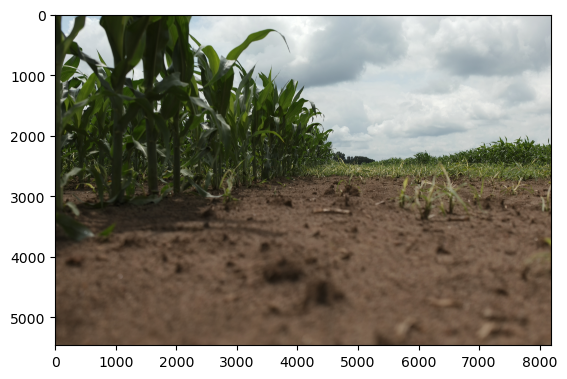

In [3]:
# read the four different images that are provided using the PIL (Pillow library) by utilizing the Image function
img = Image.open('img.JPG')   # the first image is importated by using the Image.open function. The argument in the path of the image file.
plt.imshow(img)  # using the matplotlib library, show the image in Jupyter Notebooks

#### The four images that have been loaded were acquired at four differnet corners of a crop field.

### Step 3: Obtain image metadata by using exif

In [4]:
exif_data = img._getexif()  
# EXIF data is the meta data associated with images
# This can include the resolution of the image, geocoordinates, camera name, date, time, etc.

In [5]:
exif_data

{34853: {0: b'\x02\x03\x00\x00',
  1: 'N',
  2: (41.0, 27.0, 14.3428),
  3: 'W',
  4: (86.0, 56.0, 18.9067),
  5: b'\x00',
  6: 186.666,
  9: 'A',
  18: 'WGS-84\x00'},
 296: 2,
 34665: 260,
 270: 'default',
 271: 'DJI',
 272: 'ZenmuseP1',
 305: '02.04.01.02',
 274: 1,
 306: '2022:07:27 13:07:58',
 531: 2,
 282: 72.0,
 283: 72.0,
 40092: b'0\x00.\x009\x00.\x001\x004\x002\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 40094: b's\x00i\x00n\x00g\x00l\x00e\x00',
 36864: b'0230',
 37121: b'\x01\x02\x03\x00',
 37377: 9.9658,
 36867: '2022:07:27 13:07:58',
 36868: '2022:07:27 13:07:58'

In [6]:
img_path = 'img.JPG' # make sure the image is in the same folder as the Jupyter Notebook

In [7]:
with open(img_path, 'rb') as src:
    img = exif(src)

In [8]:
img.list_all()

['image_description',
 'make',
 'model',
 'orientation',
 'x_resolution',
 'y_resolution',
 'resolution_unit',
 'software',
 'datetime',
 'y_and_c_positioning',
 '_exif_ifd_pointer',
 '_gps_ifd_pointer',
 'xp_comment',
 'xp_keywords',
 'compression',
 'jpeg_interchange_format',
 'jpeg_interchange_format_length',
 'exposure_time',
 'f_number',
 'exposure_program',
 'photographic_sensitivity',
 'sensitivity_type',
 'exif_version',
 'datetime_original',
 'datetime_digitized',
 'components_configuration',
 'shutter_speed_value',
 'aperture_value',
 'exposure_bias_value',
 'max_aperture_value',
 'metering_mode',
 'light_source',
 'flash',
 'focal_length',
 'maker_note',
 'flashpix_version',
 'color_space',
 'pixel_x_dimension',
 'pixel_y_dimension',
 '_interoperability_ifd_Pointer',
 'file_source',
 'scene_type',
 'exposure_mode',
 'white_balance',
 'digital_zoom_ratio',
 'focal_length_in_35mm_film',
 'scene_capture_type',
 'gain_control',
 'contrast',
 'saturation',
 'sharpness',
 'device_

In [9]:
print(img.gps_altitude_ref, img.gps_altitude)

GpsAltitudeRef.ABOVE_SEA_LEVEL 186.666


In [10]:
print(img.gps_latitude_ref, img.gps_latitude)

N (41.0, 27.0, 14.3428)


In [11]:
print(img.gps_longitude_ref, img.gps_longitude)

W (86.0, 56.0, 18.9067)


### Step 4: Convert image coordinates from WGS84 into decimal coordinates

In [12]:
def decimal_coords(coords, ref):
    decimal_degrees = coords[0] + coords[1] / 60 + coords[2] / 3600
    if ref == "S" or ref == "W":
        decimal_degrees = -decimal_degrees
    return decimal_degrees

In [13]:
def image_coordinates(image_path):
    with open(img_path, 'rb') as src:
        img = exif(src)
        
    if img.has_exif:
        coords = (decimal_coords(img.gps_latitude,img.gps_latitude_ref), decimal_coords(img.gps_longitude,img.gps_longitude_ref))
    else:
        print('The image has no EXIF information')
        
    print(f"Image {src.name}, OS Version:{img.get('software', 'Not Known')} -----")
    print(f"was taken: {img.datetime_original}")
    print(f"Coordiantes: {coords}")
    
    return coords

In [14]:
coordinates = image_coordinates(img_path)  # call the function to obtain the image coordinates

Image img.JPG, OS Version:02.04.01.02 -----
was taken: 2022:07:27 13:07:58
Coordiantes: (41.45398411111111, -86.93858519444444)


In [15]:
print(coordinates)  # print the coordinates

(41.45398411111111, -86.93858519444444)


#### The reason we converted WGS84 to decimal coordinates is because the Folium library requires coordinates in coordinates

### Step 5: Show the coordinates on a map using interactive visualizations (be creative)

In [16]:
m = folium.Map(location=[float(coordinates[0]), float(coordinates[1])], zoom_start=13)  # use folium.Map() to view the location

In [17]:
m  # this will show the map

In [18]:
folium.Marker([float(coordinates[0]), float(coordinates[1])], popup="<i>Image 1 Coordinates</i>").add_to(m)  # folium.Marker() will add the marker on the map

In [19]:
m  # this will shown the map

### Step 6: Repeat the steps by loading three additional images and obtaining their coordinates

In [20]:
# read image 1 'named img1.png'
img_path = 'img1.JPG'
with open(img_path,'rb') as src:
    img = exif(src)
img1 = Image.open('img1.JPG')

In [21]:
coord1 = image_coordinates('img1.JPG')

Image img1.JPG, OS Version:02.04.01.02 -----
was taken: 2022:07:27 12:55:07
Coordiantes: (41.453173222222226, -86.93984772222223)


In [22]:
m = folium.Map(location=[float(coordinates[0]), float(coordinates[1])], zoom_start=13)
folium.Marker([float(coord1[0]), float(coord1[1])], popup="<i>Image 1 Coordinates</i>").add_to(m)

In [23]:
m

In [24]:
# read image 2 'named img2.png'
# ENTER CODE HERE
img_path = 'img2.JPG'
with open(img_path,'rb') as src:
    img = exif(src)
img2 = Image.open(img_path)

In [25]:
coord2 = image_coordinates('img2.JPG')

Image img2.JPG, OS Version:02.04.01.02 -----
was taken: 2022:07:27 12:58:11
Coordiantes: (41.45316947222223, -86.93857875)


In [26]:
m = folium.Map(location=[float(coordinates[0]), float(coordinates[1])], zoom_start=13)
folium.Marker([float(coord1[0]), float(coord1[1])], popup="<i>Image 2 Coordinates</i>").add_to(m)

In [27]:
m

In [28]:
# read image 3 'named img3.png'
# ENTER CODE HERE
img_path = 'img3.JPG'
with open(img_path,'rb') as src:
    img = exif(src)
img3 = Image.open(img_path)

In [29]:
coord3 = image_coordinates('img3.JPG')

Image img3.JPG, OS Version:02.04.01.02 -----
was taken: 2022:07:27 13:03:43
Coordiantes: (41.45399175, -86.93985466666668)


In [30]:
m = folium.Map(location=[float(coordinates[0]), float(coordinates[1])], zoom_start=13)
folium.Marker([float(coord1[0]), float(coord1[1])], popup="<i>Image 3 Coordinates</i>").add_to(m)

In [31]:
m

In [32]:
# read image 4 'named img4.png'
img_path = 'img4.JPG'
with open(img_path,'rb') as src:
    img = exif(src)
img4 = Image.open(img_path)

In [33]:
coord4 = image_coordinates('img4.JPG')

Image img4.JPG, OS Version:02.04.01.02 -----
was taken: 2022:07:27 13:07:58
Coordiantes: (41.45398411111111, -86.93858519444444)


In [34]:
m = folium.Map(location=[float(coordinates[0]), float(coordinates[1])], zoom_start=13)
folium.Marker([float(coord1[0]), float(coord1[1])], popup="<i>Image 4 Coordinates</i>").add_to(m)

In [35]:
m

### Step 7: Use Shapely for plotting data and finding distance between different points at which images were acquired etec.

### Go to Google Maps

- Select at least four different coordinates in a certain region, city, country, etc. to create a contour
- Simply click anywhere on a map and record the coordinates (copy paste them here)
- For example: latitude, longitude coordinates at Purdue University are: 40.422989, -86.921776, respectively
- create variables in python such as: coord_1 = [40.422989, -86.921776]

Reference: https://gis.stackexchange.com/questions/294206/how-to-create-a-simple-polygon-from-coordinates-in-geopandas-with-python

In [36]:
# the convention for creating polygons is flipped to (logitude, latitude) as per library requirments
# therefore, these four coordinates will look flipped

coord_1 = [-86.952127, 40.466518]  # The (logitude, latitude) coordinates obtain from Google Maps for the first point
coord_2 = [-86.896625, 40.450813]  # The (logitude, latitude) coordinates obtain from Google Maps for the second point
coord_3 = [-86.921970, 40.419108]  # The (logitude, latitude) coordinates obtain from Google Maps for the third point
coord_4 = [-86.945770, 40.438876]  # The (logitude, latitude) coordinates obtain from Google Maps for the fourth point

NOTE: As per library requirements, the format for creating Polygons is (logitude, latitude) and for single point plotting, its (latitude, longitude).

In [37]:
lon_lat_list = [coord_1, coord_2, coord_3, coord_4, coord_1]  # ensure that the last and first coordinates are the same to enclose the polygon

In [38]:
polygon_geom = Polygon(lon_lat_list)  # create the polygon using the list of coordinates
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])  # convert the Polygon into the correct format

In [39]:
m = folium.Map([40.432989, -86.921776], zoom_start=13, tiles='cartodbpositron')  # center the map at Purdue University's center
folium.GeoJson(polygon).add_to(m)  # add the polygon to the map
folium.LatLngPopup().add_to(m)  # add the polygon to the map

In [40]:
m  # this will show the map

### Step 8: Calculate the perimeter and area of the Polygon.

#### Calculate the perimeter and area of polygon.

In [41]:
# specify a named ellipsoid
geod = Geod(ellps="WGS84")

In [42]:
# load the coordinates in this manner to calculate perimeter and area
poly = wkt.loads(''' POLYGON ((-86.952127 40.466518, -86.896625 40.450813, -86.921970 40.419108, -86.945770 40.438876, -86.952127 40.466518))''')

In [43]:
area = abs(geod.geometry_area_perimeter(poly)[0])  # calculate the area
perimeter = abs(geod.geometry_area_perimeter(poly)[1])  # calculate the perimeter

print('# Geodesic area: {:12.3f} m²'.format(area))
print('#                {:12.3f} km²'.format(area/1e6))

print('# Geodesic perimeter: {:12.3f} m'.format(perimeter))
print('#                {:12.3f} km'.format(perimeter/1e3))

# Geodesic area: 12670826.324 m²
#                      12.671 km²
# Geodesic perimeter:    15245.057 m
#                      15.245 km


### Step 9: Homework Assignment 

#### Task 1: Obtain coordinates to create a polygon anywhere in the wold (must use atleast 3 coordinates) to create a polygon and calculate the perimeter and area
#### Use Steps 7 and 8 as a reference

In [44]:
coord_1 = [-86.94773803527058, 40.469302405309705]  # The (logitude, latitude) coordinates obtain from Google Maps for the first point
coord_2 = [-86.95589731502272, 40.45607049541944]  # The (logitude, latitude) coordinates obtain from Google Maps for the second point
coord_3 = [-86.95259283355077, 40.44963726205429]  # The (logitude, latitude) coordinates obtain from Google Maps for the third point
coord_4 = [-86.93858519444444, 41.45398411111111]  # The (logitude, latitude) coordinates obtain from Google Maps for the fourth point

lon_lat_list = [coord_1, coord_2, coord_3, coord_4, coord_1]

polygon_geom = Polygon(lon_lat_list)  # create the polygon using the list of coordinates
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])  # convert the Polygon into the correct form

m = folium.Map([40.45, -86.94776], zoom_start=13, tiles='cartodbpositron')  # center the map at Purdue University's center
folium.GeoJson(polygon).add_to(m)  # add the polygon to the map
folium.LatLngPopup().add_to(m)  # add the polygon to the map

# specify a named ellipsoid
geod = Geod(ellps="WGS84")

# load the coordinates in this manner to calculate perimeter and area
poly = wkt.loads(''' POLYGON ((-86.94773803527058 40.469302405309705, -86.95589731502272 40.45607049541944, -86.95259283355077 40.44963726205429, -86.93858519444444 41.45398411111111, -86.91731642088872 40.4426155178007, -86.94773803527058 40.469302405309705))''')

area = abs(geod.geometry_area_perimeter(poly)[0])  # calculate the area
perimeter = abs(geod.geometry_area_perimeter(poly)[1])  # calculate the perimeter

print('# Geodesic area: {:12.3f} m²'.format(area))
print('#                {:12.3f} km²'.format(area/1e6))

print('# Geodesic perimeter: {:12.3f} m'.format(perimeter))
print('#                {:12.3f} km'.format(perimeter/1e3))

# this will show the map
m

# Geodesic area: 163484011.128 m²
#                     163.484 km²
# Geodesic perimeter:   230192.617 m
#                     230.193 km


#### Task 2: Use the custom coordinates from the 4 images (i.e., img1, img2, img3, and img4) that were uploaded to create a polygon and calculate the perimeter and area
#### Use Steps 6, 7, and 8 as a reference

In [45]:
# ENTER CODE HERE
coord_1 = [-86.93984772222223, 41.453173222222226]  # The (logitude, latitude) coordinates obtain from img1 for the first point
coord_2 = [-86.93857875, 41.45316947222223]  # The (logitude, latitude) coordinates obtain from img2 for the second point
coord_3 = [-86.93985466666668, 41.45399175]  # The (logitude, latitude) coordinates obtain from img3 for the third point
coord_4 = [-86.93858519444444, 41.45398411111111]  # The (logitude, latitude) coordinates obtain from img4 for the fourth point

lon_lat_list = [coord_2, coord_1, coord_3, coord_4, coord_2]  # ensure that the last and first coordinates are the same to enclose the polygon
polygon_geom = Polygon(lon_lat_list)  # create the polygon using the list of coordinates
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])  # convert the Polygon into the correct form

m = folium.Map([41.453, -86.94776], zoom_start=13, tiles='cartodbpositron')  # center the map
folium.GeoJson(polygon).add_to(m)  # add the polygon to the map
folium.LatLngPopup().add_to(m)  # add the polygon to the map

# specify a named ellipsoid
geod = Geod(ellps="WGS84")

# load the coordinates in this manner to calculate perimeter and area
poly = wkt.loads(''' POLYGON ((-86.94773803527058 40.469302405309705, -86.95589731502272 40.45607049541944, -86.95259283355077 40.44963726205429, -86.93858519444444 41.45398411111111, -86.91731642088872 40.4426155178007, -86.94773803527058 40.469302405309705))''')

area = abs(geod.geometry_area_perimeter(poly)[0])  # calculate the area
perimeter = abs(geod.geometry_area_perimeter(poly)[1])  # calculate the perimeter

print('# Geodesic area: {:12.3f} m²'.format(area))
print('#                {:12.3f} km²'.format(area/1e6))

print('# Geodesic perimeter: {:12.3f} m'.format(perimeter))
print('#                {:12.3f} km'.format(perimeter/1e3))

# this will show the map
m

# Geodesic area: 163484011.128 m²
#                     163.484 km²
# Geodesic perimeter:   230192.617 m
#                     230.193 km
